<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 11. Reactions
## Diffusion, advection, reaction
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

----
In this notebook, we derive operators for numerically calculating **diffusion** and **advection**
terms. We start with **one-dimensional functions**, then expand to **two dimenions**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

----
## 1D function

Consider the 1D function $f(x)$ and its first and second derivative:
$$
\begin{array}{rcl}
f(x) &=& x^2 \\
\frac{d}{dx} f(x) &=& 2x \\
\frac{d^2}{dx^2} f(x) &=& 2
\end{array}
$$
We define these three functions and plot them in the interval $x \in [-3,3]$:

In [2]:
def f(x):
    return x**2

def df(x):
    return 2*x

def d2f(x):
    return 2.*np.ones(len(x))

In [3]:
x,dx  = np.linspace(-3,3,21,retstep=True)
#dx = x[1]-x[0]

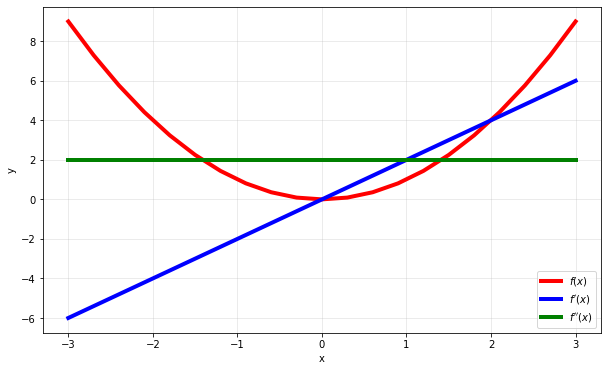

In [4]:
plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
plt.plot(x,f(x),linewidth=4,color='red',label='$f(x)$')
plt.plot(x,df(x),linewidth=4,color='blue',label='$f\'(x)$')
plt.plot(x,d2f(x),linewidth=4,color='green',label='$f\'\'(x)$')
plt.legend()

We reformulate the first and second-order derivatives into **finite-difference operators**:
$$
\begin{array}{rcl}
\frac{\displaystyle d}{\displaystyle dx}f(x_0) 
&=& \frac{\displaystyle f(x_0+h) - f(x_0-h)}{\displaystyle 2h} + O(h^2) \\
\frac{\displaystyle d^2}{\displaystyle dx^2}f(x_0) 
&=& \frac{\displaystyle f(x_0+h) + f(x_0-h) - 2f(x_0)}{\displaystyle h^2} + O(h^2)
\end{array}
$$

In [5]:
def gradient1D(f,x,dx):
    gradient1D = (f(x+dx)-f(x-dx)) / (2*dx)
    return gradient1D

def laplacian1D(f,x,dx):
    laplacian1D = (f(x+dx)+f(x-dx)-2*f(x)) / (dx**2)
    return laplacian1D

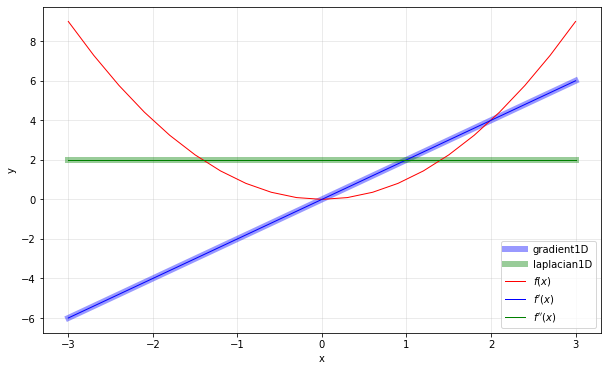

In [6]:
plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
plt.plot(x,gradient1D(f,x,dx),linewidth=6,color='blue',alpha=0.4,label='gradient1D')
plt.plot(x,laplacian1D(f,x,dx),linewidth=6,color='green',alpha=0.4,label='laplacian1D')
plt.plot(x,f(x),linewidth=1,color='red',label='$f(x)$')
plt.plot(x,df(x),linewidth=1,color='blue',label='$f\'(x)$')
plt.plot(x,d2f(x),linewidth=1,color='green',label='$f\'\'(x)$')
plt.legend()

----
## 2D function

Next, consider the 2D function $f(x,y)$ and its first and second derivative:
$$
\begin{array}{rcl}
f(x,y) &=& x^2+y^2 \\
\nabla f(x,y) &=& \left( 2x,2y \right)^T \\
\nabla^2 f(x,y) &=& 4
\end{array}
$$
Here, $\nabla=(\frac{d}{dx},\frac{d}{dy})^T$ and 
$\nabla^2=\Delta=(\frac{d^2}{dx^2}+\frac{d^2}{dy^2})$
holds.

We define these three functions and plot them in the interval $x \in [-4,4]$:

In [7]:
def fxy(x,y):
    fxy = np.zeros(len(x)*len(y)).reshape(len(x),len(y))
    for i in range(len(x)):
        for j in range(len(y)):
            fxy[i,j] = x[i]**2+y[j]**2
    return fxy

def dfxy(x,y):
    dxfxy = np.zeros(len(x)*len(y)).reshape(len(x),len(y))
    dyfxy = np.zeros(len(x)*len(y)).reshape(len(x),len(y))
    for i in range(len(x)):
        for j in range(len(y)):
            dxfxy[i,j] = 2*x[i]
            dyfxy[i,j] = 2*y[j]
    return dxfxy,dyfxy

def d2fxy(x,y):
    d2fxy = np.zeros(len(x)*len(y)).reshape(len(x),len(y))
    for i in range(len(x)):
        for j in range(len(y)):
            d2fxy[i,j] = 4
    return d2fxy

In [10]:
x,dx = np.linspace(-4,4,21,retstep=True)
y,dy = np.linspace(-4,4,21,retstep=True)
#dx = x[1]-x[0]
#dy = y[1]-y[0]

/var/folders/2n/l4lbpz315tgd3w5k2mf_52v40000gn/T/ipykernel_1355/2336181611.py:12: UserWarning: No contour levels were found within the data range.
  csxy=axs[2].contour(x,y,d2fxy(x,y),colors='white')


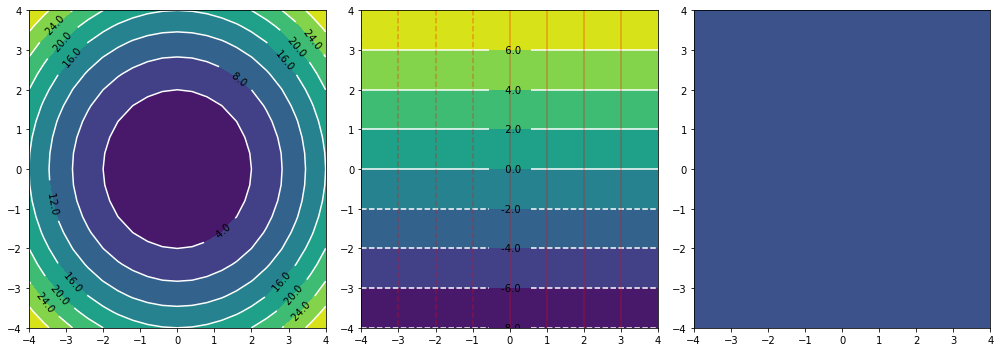

In [11]:
fig,axs = plt.subplots(1,3,figsize=(14,5))
axs[0].contourf(x,y,fxy(x,y))
cs0=axs[0].contour(x,y,fxy(x,y),colors='white')
axs[0].clabel(cs0, inline=1, fontsize=10,fmt='%5.1f',colors='black')

axs[1].contourf(x,y,dfxy(x,y)[0])
csx=axs[1].contour(x,y,dfxy(x,y)[0],colors='white')
csy=axs[1].contour(x,y,dfxy(x,y)[1],colors='red',alpha=0.3)
axs[1].clabel(csx, inline=1, fontsize=10,fmt='%5.1f',colors='black')

axs[2].contourf(x,y,d2fxy(x,y))
csxy=axs[2].contour(x,y,d2fxy(x,y),colors='white')
axs[2].clabel(csxy, inline=1, fontsize=10,fmt='%5.1f',colors='black')

plt.tight_layout()

We reformulate the first and second-order derivatives into **finite-difference operators**:
$$
\begin{array}{rcl}
\frac{\displaystyle d}{\displaystyle dx}f(x,y) 
&=& \frac{\displaystyle f(x+dx,y) - f(x-dx,y)}{\displaystyle 2\Delta x} + O(h^2) \\
\frac{\displaystyle d}{\displaystyle dy}f(x,y) 
&=& \frac{\displaystyle f(x,y+dy) - f(x,y-dy)}{\displaystyle 2\Delta y} + O(h^2) \\
\left( \frac{\displaystyle d^2}{\displaystyle dx^2} +
       \frac{\displaystyle d^2}{\displaystyle dy^2} \right) f(x,y)
&=&\frac{\displaystyle f(x+dx,y) + f(x-dx,y) + f(x,y+dy) + f(x,y-dy) - 4f(x,y)}{\displaystyle \Delta x \Delta y} + O(h^2)
\end{array}
$$

In [12]:
def gradient2D(f,x,y,dx,dy):
    gradient2Dx = (f(x+dx,y)-f(x-dx,y)) / (2*dx)
    gradient2Dy = (f(x,y+dy)-f(x,y-dy)) / (2*dy)
    return gradient2Dx,gradient2Dy

def laplacian2D(f,x,y,dx,dy):
    laplacian2D = (f(x+dx,y)+f(x-dx,y)+f(x,y+dy)+f(x,y-dy)-4*f(x,y)) / (dx*dy)
    return laplacian2D

print(laplacian2D(fxy,x,y,dx,dy).min())
print(laplacian2D(fxy,x,y,dx,dy).max())

3.999999999999914
4.0000000000000915


/var/folders/2n/l4lbpz315tgd3w5k2mf_52v40000gn/T/ipykernel_1355/2201943795.py:12: UserWarning: No contour levels were found within the data range.
  csxy=axs[2].contour(x,y,np.around(laplacian2D(fxy,x,y,dx,dy),2),colors='white')


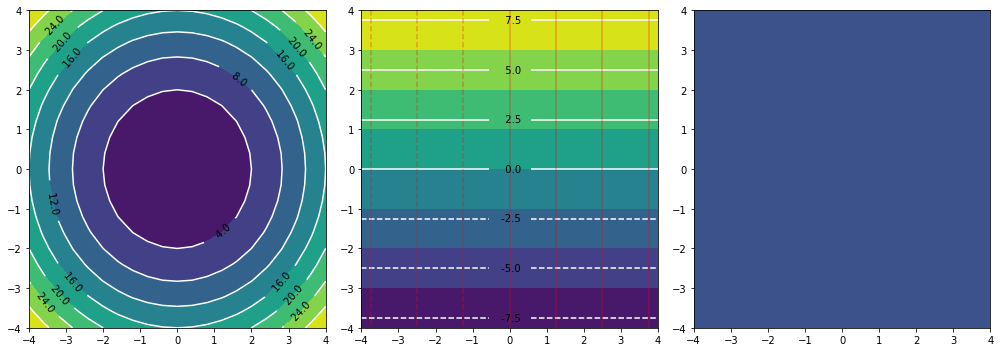

In [13]:
fig,axs = plt.subplots(1,3,figsize=(14,5))
axs[0].contourf(x,y,fxy(x,y))
cs0=axs[0].contour(x,y,fxy(x,y),colors='white')
axs[0].clabel(cs0, inline=1, fontsize=10,fmt='%5.1f',colors='black')

axs[1].contourf(x,y,dfxy(x,y)[0])
csx=axs[1].contour(x,y,gradient2D(fxy,x,y,dx,dy)[0],colors='white')
csy=axs[1].contour(x,y,gradient2D(fxy,x,y,dx,dy)[1],colors='red',alpha=0.3)
axs[1].clabel(csx, inline=1, fontsize=10,fmt='%5.1f',colors='black')

axs[2].contourf(x,y,d2fxy(x,y))
csxy=axs[2].contour(x,y,np.around(laplacian2D(fxy,x,y,dx,dy),2),colors='white')
axs[2].clabel(csxy, inline=1, fontsize=10,fmt='%5.1f',colors='black')

plt.tight_layout()

... done